In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2, :2] #选择y==0或者y==1的样本，这些样本的前两个特征
y = y[y<2]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


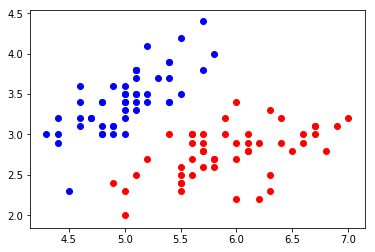

In [4]:
plt.scatter(X[y==0, 0],X[y==0, 1], color = 'b')
plt.scatter(X[y==1, 0],X[y==1, 1], color = 'r')
plt.show()

### Using Logistic Regression

In [6]:
import sys
sys.path.append("..")
from myML.model_selection import my_train_test_split

X_train, X_test, y_train, y_test = my_train_test_split(X, y, seed = 666)

In [8]:
from myML.LogisticRegression import myLogisticRegression

log_reg = myLogisticRegression()
log_reg.fit(X_train, y_train)

Bessie: myLogisticRegression().

In [9]:
log_reg.score(X_test, y_test) #100%正确

1.0

In [10]:
log_reg.predict_proba(X_test)

array([0.9297264 , 0.98665137, 0.14851233, 0.01685708, 0.03697949,
       0.01866111, 0.04936428, 0.9966931 , 0.97994217, 0.7452538 ,
       0.04472737, 0.00339218, 0.26130536, 0.03697949, 0.84193744,
       0.79893022, 0.82890999, 0.32357568, 0.06534762, 0.20734526])

In [11]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [12]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [13]:
y_test == log_reg.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [14]:
log_reg.coef_

array([ 3.01807431, -5.04464761])

In [15]:
log_reg.interception_

-0.6938162524426628